In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from string import ascii_uppercase
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('C:/Users/Preston Wong/Downloads/letter-recognition.data', delimiter=',', header=-1)

In [3]:
df2 = df.copy()
df = df.drop([0], axis=1)
df = df.join(df2[0])

In [4]:
X_and_Y = df.as_matrix()
#np.random.shuffle(X_and_Y)
X_and_Y = X_and_Y[:5000, :17]
X = X_and_Y[:, 0:-1]
Y = X_and_Y[:, -1]
print(X_and_Y.shape, X.shape, Y.shape)

(5000, 17) (5000, 16) (5000,)


In [5]:
#change to binary classification
#alphabet_list = []
ordlist = []
for i in range(len(Y)):
    #alphabet_list.append(Y[i])
    ordlist.append(ord(Y[i]))

In [6]:
#print(alphabet_list)
print(ordlist)

[84, 73, 68, 78, 71, 83, 66, 65, 74, 77, 88, 79, 71, 77, 82, 70, 79, 67, 84, 74, 74, 72, 83, 79, 74, 67, 77, 87, 72, 71, 76, 76, 88, 66, 77, 71, 79, 80, 71, 69, 88, 69, 88, 71, 86, 88, 87, 71, 82, 83, 89, 76, 89, 74, 83, 81, 81, 68, 67, 76, 78, 67, 69, 88, 72, 76, 72, 69, 89, 72, 81, 81, 81, 74, 74, 68, 82, 77, 65, 78, 77, 80, 67, 80, 78, 87, 86, 86, 77, 69, 78, 89, 87, 79, 78, 72, 79, 78, 72, 85, 89, 83, 83, 84, 67, 86, 84, 75, 68, 87, 73, 69, 70, 73, 72, 85, 67, 70, 65, 90, 88, 78, 82, 66, 66, 85, 74, 70, 77, 72, 65, 79, 69, 85, 65, 88, 83, 74, 75, 73, 80, 84, 67, 72, 65, 76, 84, 65, 86, 85, 73, 90, 86, 77, 76, 79, 66, 65, 75, 72, 84, 87, 70, 65, 69, 77, 66, 77, 89, 86, 83, 67, 72, 85, 80, 90, 69, 78, 80, 72, 84, 66, 85, 83, 70, 74, 82, 69, 80, 73, 75, 68, 66, 72, 77, 80, 79, 83, 75, 86, 70, 89, 68, 90, 81, 83, 66, 75, 86, 66, 89, 79, 90, 76, 74, 90, 65, 76, 74, 81, 78, 90, 69, 74, 68, 79, 76, 86, 88, 74, 78, 72, 65, 80, 65, 70, 88, 68, 86, 80, 70, 80, 89, 87, 80, 74, 69, 83, 69, 66,

In [7]:
for i in range(len(Y)):
    if ((ordlist[i]) >= 65 and (ordlist[i] <= 77)):
        Y[i] = 1
    else:
        Y[i] = 0

In [9]:
depth_list = []
for i in range(1, 21, 1):
    depth_list.append(i)
print(depth_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [10]:
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
params = {'max_depth':depth_list}
grid_search = GridSearchCV(classifier, params, return_train_score = True, cv=5)

In [11]:
def draw_heatmap_linear(acc, acc_desc, depth_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=depth_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='depth')
    plt.title(acc_desc + ' w.r.t depth')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [12]:
Y = Y.astype('int')
X_train_val = X[:int(0.8*len(X))] # Get features from train + val set.
X_test      = X[int(0.8*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.8*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.8*len(Y)):] # Get labels from test set.  

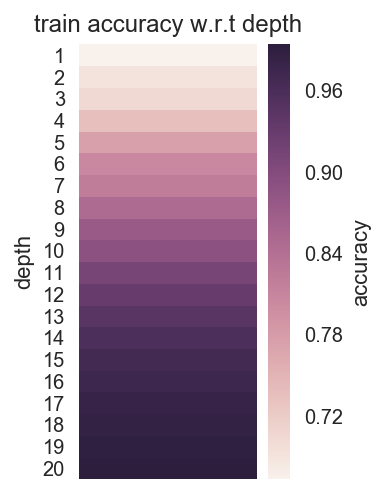

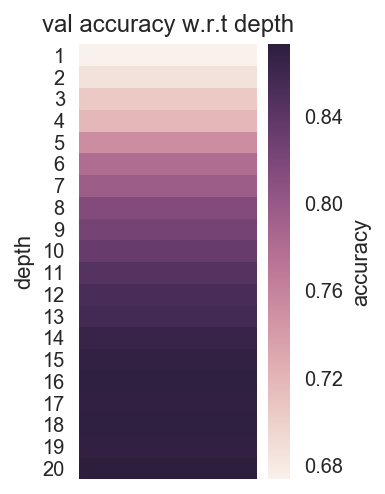

In [13]:
grid_search.fit(X_train_val, Y_train_val)
train_acc = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [14]:
test_acc = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc)
tot_train = (sum(train_acc)/len(train_acc))
print(tot_train)
tot_val = (sum(val_acc)/len(val_acc))
print(tot_val)

{'max_depth': 20}
0.878
[ 0.87315937]
[ 0.8115]


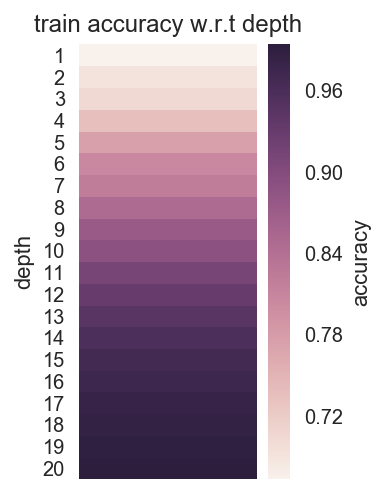

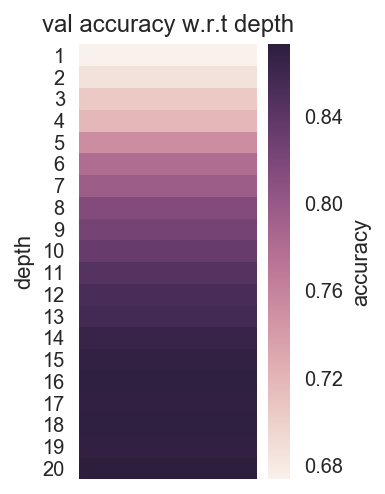

In [15]:
X_train_val = X[:int(0.5*len(X))] # Get features from train + val set.
X_test      = X[int(0.5*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.5*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.5*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc2 = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc2 = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [16]:
test_acc2 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc2)
tot_train2 = (sum(train_acc2)/len(train_acc2))
print(tot_train2)
tot_val2 = (sum(val_acc2)/len(val_acc2))
print(tot_val2)

{'max_depth': 18}
0.8508
[ 0.88410217]
[ 0.80386]


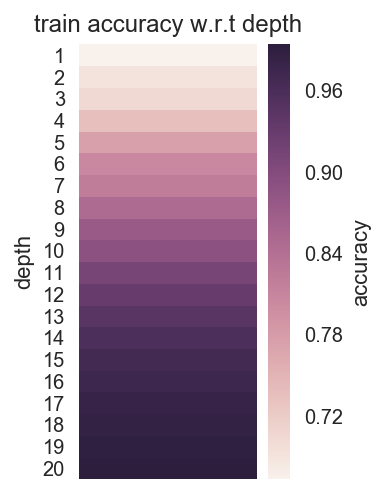

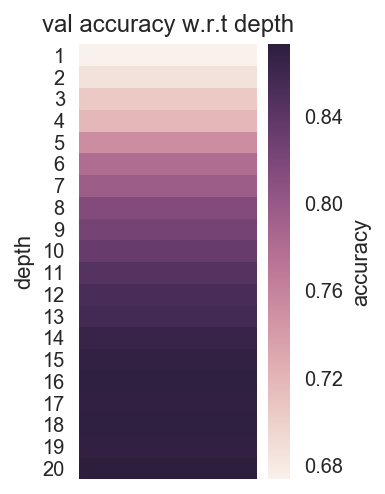

In [17]:
X_train_val = X[:int(0.2*len(X))] # Get features from train + val set.
X_test      = X[int(0.2*len(X)):] # Get features from test set.     
Y_train_val = Y[:int(0.2*len(Y))] # Get labels from train + val set.
Y_test      = Y[int(0.2*len(Y)):] # Get labels from test set.  
grid_search.fit(X_train_val, Y_train_val)
train_acc3 = grid_search.cv_results_['mean_train_score'].reshape(-1,1)
draw_heatmap_linear(train_acc, 'train accuracy', depth_list)

val_acc3 = grid_search.cv_results_['mean_test_score'].reshape(-1,1)
draw_heatmap_linear(val_acc, 'val accuracy', depth_list)

In [18]:
test_acc3 = sum(grid_search.best_estimator_.predict(X_test) == Y_test) / len(X_test)
print(grid_search.best_params_)
print(test_acc3)
tot_train3 = (sum(train_acc3)/len(train_acc3))
print(tot_train3)
tot_val3 = (sum(val_acc3)/len(val_acc3))
print(tot_val3)

{'max_depth': 18}
0.83175
[ 0.88453319]
[ 0.76065]


In [19]:
avg_test = (test_acc + test_acc2 + test_acc3)/3
avg_train = sum(tot_train + tot_train2 + tot_train3)/3
avg_val = sum(tot_val + tot_val2 + tot_val3)/3
print(avg_test, avg_train, avg_val)

0.853516666667 0.880598243428 0.792003333333
